# K Means Clustering Project

This project will attempt to use `K Means Clustering` to cluster **Universities** into two groups, **Private** and **Public**.

It is **very important to note, we actually have the labels for this data set, but we will NOT use them for the `K Means Clustering` algorithm, since that is an unsupervised learning algorithm**.

When using the `K Means` algorithm under normal circumstances, it is because we don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but we won't usually do this for `K Means`, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!

## The Data

> `College_Data.csv` with 777 observations on the following 18 variables:
* `Private` A factor with levels No and Yes indicating private or public university
* `Apps` Number of applications received
* `Accept` Number of applications accepted
* `Enroll` Number of new students enrolled
* `Top10perc` Pct. new students from top 10% of H.S. class
* `Top25perc` Pct. new students from top 25% of H.S. class
* `F.Undergrad` Number of fulltime undergraduates
* `P.Undergrad` Number of parttime undergraduates
* `Outstate` Out-of-state tuition
* `Room.Board` Room and board costs
* `Books` Estimated book costs
* `Personal` Estimated personal spending
* `PhD` Pct. of faculty with Ph.D.’s
* `Terminal` Pct. of faculty with terminal degree
* `S.F.Ratio` Student/faculty ratio
* `perc.alumni` Pct. alumni who donate
* `Expend` Instructional expenditure per student
* `Grad.Rate` Graduation rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading Data

In [2]:
# Read in the College_Data.csv file and set the first column as the index
universities = pd.read_csv('College_Data.csv', index_col=0)

In [3]:
# Check the head of the data
universities.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
# Check the info() method on the data
universities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [5]:
# Check the describe() on the data
universities.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Exploratory Data Analysis

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

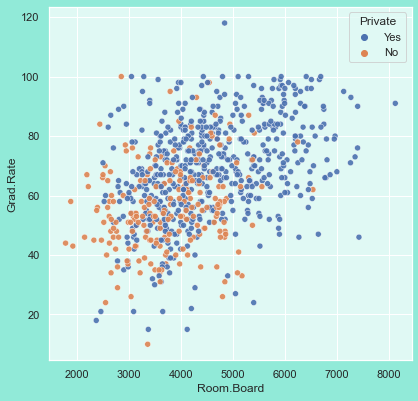

In [6]:
# Create a scatteredplot of `Grad.Rate` versus `Room.Board` where
# the points are colored by the `Private` column
plt.figure(
    figsize=(6.5, 6.5), # Size of plot
    facecolor='#91EAD8', # The background color
)

sns.set(
    rc={
        'axes.facecolor':'#E0F9F4',
        'figure.facecolor':'#E0F9F4'
    }
)

sns.scatterplot(
    data=universities,
    x='Room.Board',
    y='Grad.Rate',
    hue='Private',
    alpha=0.9,
)

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

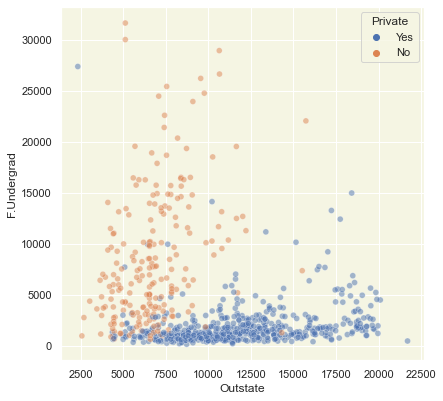

In [7]:
# Create a scatterplot of `F.Undergrad` versus `Outstate` where
# the points are colored by the `Private` column
plt.figure(
    figsize=(6.5, 6.5),
    facecolor='white'
)

sns.set(
    rc={
        'axes.facecolor':'#F5F5E3',
        'figure.facecolor':'white'
    }
)

sns.scatterplot(
    data=universities,
    x='Outstate',
    y='F.Undergrad',
    hue='Private',
    alpha=0.5
)

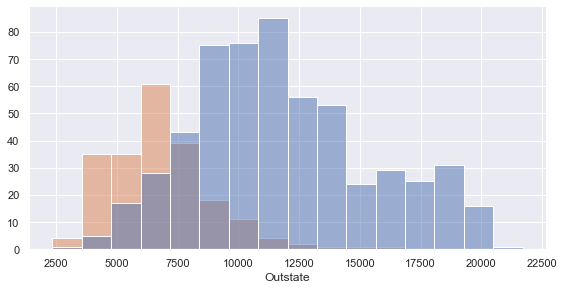

In [8]:
# Create a stacked histogram showing `Outstate` (Out of State Tuition)
# based on the `Private` column
sns.set_theme() # Use seaborn default theme

g = sns.FacetGrid(
    data=universities,
    height=4,
    aspect=2 # width = aspect * height,
)
g.map_dataframe(sns.histplot, x='Outstate', hue='Private')
g.set_xlabels(label='Outstate')

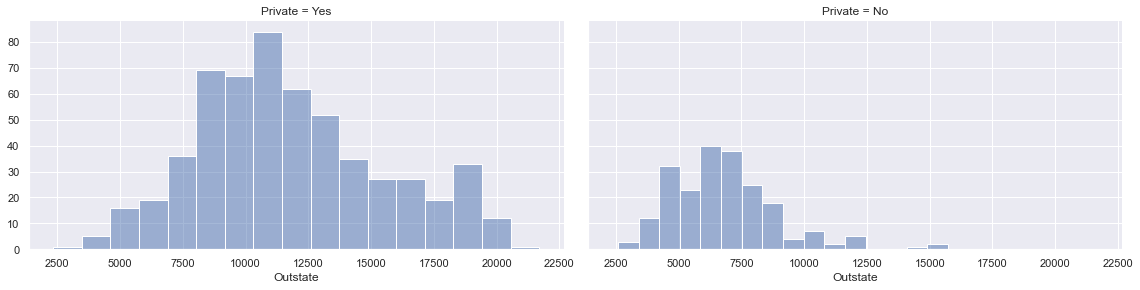

In [9]:
# Create two separate histograms showing `Outstate` (Out of State Tuition)
# based on the `Private` column
sns.set_theme() # Use seaborn default theme

g = sns.FacetGrid(
    data=universities,
    col='Private',
    height=4,
    aspect=2 # width = aspect * height,
)
g.map_dataframe(sns.histplot, x='Outstate', hue='Private')
g.set_xlabels(label='Outstate')

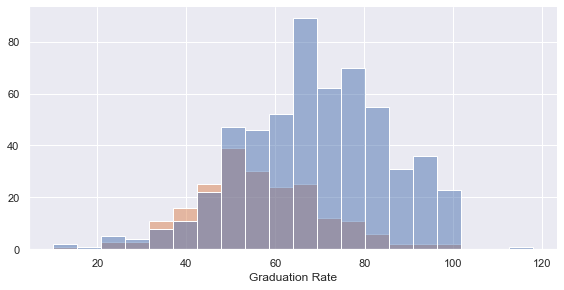

In [10]:
# Create a stacked histogram showing `Grad.Rate` (Graduation Rate)
# based on the `Private` column
sns.set_theme() # Use seaborn default theme

g = sns.FacetGrid(
    data=universities,
    height=4,
    aspect=2 # width = aspect * height,
)
g.map_dataframe(sns.histplot, x='Grad.Rate', hue='Private')
g.set_xlabels(label='Graduation Rate')

<font color=magenta>Notice how there seems to be a private school with a graduation rate of higher than 100%. Let's find that school!</font>

In [11]:
# Find school whose graduation rate is higher than 100%
universities[universities['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


<font color=magenta>Fix the above exception case by setting that school's `Grad.Rate` to 100 - which is an acceptable percentage value expressing `Graduation Rate`.</font>

In [12]:
# Fix `Grad.Rate` > 100
universities.loc[universities['Grad.Rate'] > 100, 'Grad.Rate'] = 100

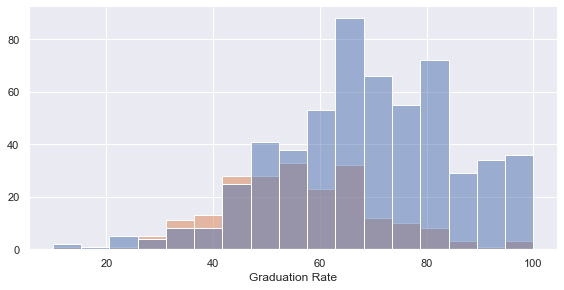

In [13]:
# Confirm that no university has a `Grad.Rate` of higher than 100
# by recreating a stacked histogram showing `Grad.Rate` (Graduation Rate)
# based on the `Private` column
sns.set_theme() # Use seaborn default theme

g = sns.FacetGrid(
    data=universities,
    height=4,
    aspect=2 # width = aspect * height,
)
g.map_dataframe(sns.histplot, x='Grad.Rate', hue='Private')
g.set_xlabels(label='Graduation Rate')

## K Means Cluster Creation

In [14]:
from sklearn.cluster import KMeans

In [15]:
# Create an instance of a K Means model with 2 clusters
kmeans = KMeans(n_clusters=2)

In [16]:
# Fit the model to all the data except for the Private label
kmeans.fit(universities.drop('Private', axis=1))

KMeans(n_clusters=2)

In [17]:
# Check the cluster center vectors
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

In [18]:
# Check the cluster labels that the kmeans model returned
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Evaluation

<font color=magenta>Normally, we don't have `prepared true` labels for real-world problems in the `unsupervised learning` domain. In this project, however, we have such kind of labels. We, therefore, can look into those true labels and the ones the `K Means Clustering` model predicted and see how good the model is.</font>

In [19]:
# Create a column for the `universities` DataFrame and call it 'Cluster',
# which is a 1 for Private school, and a 0 for Public school.
universities['Cluster'] = universities['Private'] == 'Yes'
universities['Cluster'] = universities['Cluster'].astype(int)

In [20]:
universities

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [21]:
# Print out a classification report and a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(universities['Cluster'], kmeans.labels_))
print(confusion_matrix(universities['Cluster'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

[[ 74 138]
 [ 34 531]]


<font color=magenta>Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups! That is what `K Means` is useful for clustering `un-labeled` data.</font>